# 4.1
    logistic 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')

In [3]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight', 'Length','Diagonal','Height', 'Width']].to_numpy()

In [6]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
# fit_transform 으로 없앨 수 있음
ss.fit(train_input)

StandardScaler()

In [13]:
train_scaled = ss.fit_transform(train_input)

In [14]:
test_scaled = ss.transform(test_input)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [17]:
kn.score(train_scaled, train_target)

0.8907563025210085

In [18]:
kn.score(test_scaled, test_target)

0.85

In [19]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [20]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

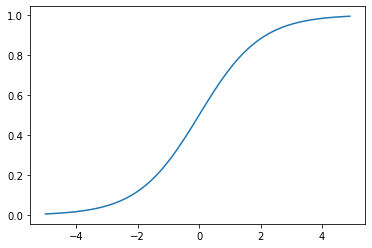

In [21]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)

In [22]:
char_arr = np.array(['A', 'B', 'C','D','E'])

In [23]:
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [24]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [27]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [28]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [29]:
print(lr.classes_)

['Bream' 'Smelt']


In [30]:
lr.coef_

array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]])

In [31]:
lr.intercept_

array([-2.16155132])

In [32]:
decisions = lr.decision_function(train_bream_smelt[:5])

In [33]:
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [34]:
lr= LogisticRegression(C = 20, max_iter=1000)

In [35]:
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [36]:
print(lr.score(train_scaled, train_target))

0.9327731092436975


In [37]:
print(lr.score(test_scaled, test_target))

0.925


In [38]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [39]:
proba = lr.predict_proba(test_scaled[:5])

np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [40]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [41]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [42]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [43]:
from scipy.special import softmax

In [44]:
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 4.2

In [45]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [46]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [47]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, random_state = 42)

In [48]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [49]:
from sklearn.linear_model import SGDClassifier

In [50]:
sc = SGDClassifier(loss= 'log',max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [51]:
sc.score(train_scaled, train_target)

0.773109243697479

In [52]:
sc.score(test_scaled, test_target)

0.775

In [53]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [54]:
sc.score(train_scaled, train_target)

0.8151260504201681

In [55]:
sc.score(test_scaled, test_target)

0.825

In [56]:
sc = SGDClassifier(loss= 'log', random_state=42)

In [62]:
train_score = []
test_score = []
classes = np.unique(train_target)

In [64]:
for i in range(300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

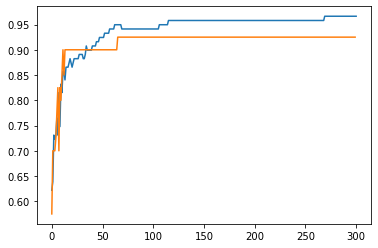

In [65]:
plt.plot(train_score)
plt.plot(test_score)

In [67]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [68]:
sc.score(train_scaled, train_target)

0.957983193277311

In [69]:
sc.score(test_scaled, test_target)

0.925